In [52]:
import gzip
import json
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

In [53]:
with gzip.open('NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar.json.gz','rb') as f:
    design = json.loads(f.read().decode('utf-8'))

In [54]:
instances = pd.DataFrame(design['instances'])
nets = pd.DataFrame(design['nets'])

In [55]:
instances

,name,id,xloc,yloc,cell,orient
0,clk_gate_out_reg/latch,0,41984,44544,23,0
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0
...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4
3948,U4125,3948,33664,66048,42,0
3949,U4128,3949,23296,66048,34,0
3950,ZCTSBUF_205_132,3950,40576,44544,11,0


In [56]:
nets

,name,id
0,clk,0
1,reset,1
2,in[383],2
3,in[382],3
4,in[381],4
...,...,...
4477,n6899,4477
4478,n6900,4478
4479,n6903,4479
4480,n6915,4480


In [57]:
with gzip.open('NCSU-DigIC-GraphData-2023-07-25/cells.json.gz','rb') as f:
    cells = json.loads(f.read().decode('utf-8'))
cells

[{'name': 'AND2_X1',
  'width': 768,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 0},
 {'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3},
 {'name': 'AND4_X1',
  'width': 1152,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id

In [66]:
len(cells)

80

In [58]:
conn=np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar_connectivity.npz')
A = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])
A

<3952x4482 sparse matrix of type '<class 'numpy.int64'>'
	with 17444 stored elements in COOrdinate format>

In [59]:
x = 0
for i in range(100):
    for j in range(100):
        if ((A.getrow(i).getcol(j).toarray()[0][0]) > 0):
            x += 1
print(x)

0


In [60]:
A = A.__mul__(A.T)
A

<3952x3952 sparse matrix of type '<class 'numpy.int64'>'
	with 141472 stored elements in Compressed Sparse Row format>

In [61]:
x = 0
for i in range(100):
    for j in range(100):
        if ((A.getrow(i).getcol(j).toarray()[0][0]) > 0):
            x += 1
print(x)

2812


In [62]:
def buildBST(array,start=0,finish=-1):
    if finish<0:
        finish = len(array)
    mid = (start + finish) // 2
    if mid-start==1:
        ltl=start
    else:
        ltl=buildBST(array,start,mid)
    
    if finish-mid==1:
        gtl=mid
    else:
        gtl=buildBST(array,mid,finish)
        
    return((array[mid],ltl,gtl))

In [124]:
congestion_data = np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar_congestion.npz')
xbst=buildBST(congestion_data['xBoundaryList'])
ybst=buildBST(congestion_data['yBoundaryList'])
demand = np.zeros(shape = [instances.shape[0],])
capacity = np.zeros(shape = [instances.shape[0],])

In [125]:
congestion_data['demand']

array([[[ 0,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 2,  0,  0, ...,  0,  0,  1],
        ...,
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 1,  0,  0, ...,  0,  0,  1],
        [ 0,  0,  0, ...,  0,  0,  1]],

       [[ 2,  2,  5, ...,  3,  2,  2],
        [ 3,  2,  4, ...,  2,  1,  0],
        [ 2,  3,  6, ...,  2,  2,  0],
        ...,
        [ 3,  3,  9, ...,  4,  3,  1],
        [ 2,  5,  7, ...,  3,  3,  1],
        [ 0,  1,  2, ...,  1,  1,  1]],

       [[ 2,  0,  3, ...,  1,  0,  1],
        [ 3,  0,  7, ...,  2,  2,  1],
        [ 5,  2,  8, ...,  3, 14, 16],
        ...,
        [ 4,  3,  6, ...,  3,  1,  2],
        [ 1,  3,  5, ...,  1,  2,  1],
        [ 0,  1,  1, ...,  0,  1,  0]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [126]:
congestion_data['capacity']

array([[[15, 12, 12, ..., 12,  5, 14],
        [ 3,  0,  0, ...,  0,  0,  3],
        [ 3,  0,  0, ...,  0,  0,  3],
        ...,
        [ 3,  0,  0, ...,  0,  0,  3],
        [ 3,  0,  0, ...,  0,  0,  3],
        [ 3,  0,  0, ...,  0,  0,  3]],

       [[11, 11, 11, ..., 11, 11, 11],
        [ 8,  6,  9, ...,  8,  5,  6],
        [ 5,  5,  7, ...,  8,  6,  7],
        ...,
        [ 6,  6, 10, ...,  8,  6,  7],
        [11, 11,  8, ...,  8,  6,  7],
        [12, 12, 12, ..., 12, 11, 11]],

       [[15, 12, 10, ..., 12,  5, 14],
        [11,  8, 12, ..., 12,  5, 14],
        [11,  8, 12, ..., 12, 12, 15],
        ...,
        [11,  8, 12, ..., 12, 12, 15],
        [11,  8, 12, ..., 12,  5, 14],
        [15, 12, 12, ..., 12,  5, 14]],

       ...,

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0

In [127]:
def getGRCIndex(x,y,xbst,ybst):
    while (type(xbst)==tuple):
        if x < xbst[0]:
            xbst=xbst[1]
        else:
            xbst=xbst[2]
            
    while (type(ybst)==tuple):
        if y < ybst[0]:
            ybst=ybst[1]
        else:
            ybst=ybst[2]
            
    return ybst, xbst

In [128]:
for k in range(instances.shape[0]):
    #print(k)
    xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']
    i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    d = 0 
    c = 0
    for l in list(congestion_data['layerList']): 
        lyr=list(congestion_data['layerList']).index(l)
        d += congestion_data['demand'][lyr][i][j]
        c += congestion_data['capacity'][lyr][i][j]
    demand[k] = d
    capacity[k] = c
        
instances['routing_demand'] = demand
instances['routing_capacity'] = capacity

In [129]:
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0
...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0
3948,U4125,3948,33664,66048,42,0,30.0,30.0
3949,U4128,3949,23296,66048,34,0,27.0,29.0
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0


In [132]:
instances['congested'] = instances['routing_demand'] > instances['routing_capacity']
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0,False
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0,False
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0,False
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0,False
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0,False
...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0,False
3948,U4125,3948,33664,66048,42,0,30.0,30.0,False
3949,U4128,3949,23296,66048,34,0,27.0,29.0,False
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0,False


In [134]:
sum(instances['congested'] == True)

45

In [7]:
for key in conn:
    print(key)

row
col
data
shape


In [10]:
conn['row']

array([3951,  492,  941, ...,    2,    1,    0])

In [70]:
congestion_data['layerList']

array(['M1', 'MINT1', 'MINT2', 'MINT3', 'MINT4', 'MINT5', 'MSMG1',
       'MSMG2', 'MSMG3', 'MSMG4', 'MSMG5', 'MG1', 'MG2'], dtype='<U5')

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

In [73]:
G = nx.from_numpy_array(A)

In [74]:
num_nodes = nx.number_of_nodes(G)
num_edges = nx.number_of_edges(G)
avg_degree = sum(dict(G.degree()).values()) / num_nodes
density = nx.density(G)
clustering_coefficient = nx.average_clustering(G)
diameter = nx.diameter(G)
avg_path_length = nx.average_shortest_path_length(G)

In [75]:
num_nodes

3952

In [76]:
num_edges

72712

In [77]:
avg_degree

36.797570850202426

In [78]:
density

0.009313482877803703

In [79]:
clustering_coefficient

0.5102145938022059

In [80]:
diameter

6

In [81]:
avg_path_length

3.741580694479028

In [83]:
depths_graph = nx.shortest_path_length(G)#, source='OBT:000000')


In [84]:
max(depths_graph)

(3951,
 {3951: 0,
  0: 1,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  3950: 1,
  44: 2,
  43: 2,
  42: 2,
  41: 2,
  40: 2,
  39: 2,
  38: 2,
  37: 2,
  36: 2,
  35: 2,
  34: 2,
  33: 2,
  32: 2,
  31: 2,
  30: 2,
  29: 2,
  28: 2,
  27: 2,
  26: 2,
  25: 2,
  24: 2,
  23: 2,
  22: 2,
  21: 2,
  20: 2,
  19: 2,
  18: 2,
  17: 2,
  16: 2,
  15: 2,
  14: 2,
  13: 2,
  414: 2,
  421: 2,
  77: 2,
  76: 2,
  75: 2,
  74: 2,
  73: 2,
  72: 2,
  71: 2,
  70: 2,
  69: 2,
  68: 2,
  67: 2,
  66: 2,
  65: 2,
  64: 2,
  63: 2,
  62: 2,
  61: 2,
  60: 2,
  59: 2,
  58: 2,
  57: 2,
  56: 2,
  55: 2,
  54: 2,
  53: 2,
  52: 2,
  51: 2,
  50: 2,
  49: 2,
  48: 2,
  47: 2,
  46: 2,
  428: 2,
  110: 2,
  109: 2,
  108: 2,
  107: 2,
  106: 2,
  105: 2,
  104: 2,
  103: 2,
  102: 2,
  101: 2,
  100: 2,
  99: 2,
  98: 2,
  97: 2,
  96: 2,
  95: 2,
  94: 2,
  93: 2,
  92: 2,
  91: 2,
  90: 2,
  89: 2,
  88: 2,
  87: 2,
  86: 2,
  85: 2,
  84: 2,
  83: 2,
  82

In [86]:
max(len(c) for c in nx.find_cliques(G))

42

In [89]:
degree_cent = nx.degree_centrality(G)
#eigen_cent = nx.eigenvector_centrality(G)

In [90]:
degree_cent

{0: 0.012148823082763858,
 1: 0.012148823082763858,
 2: 0.012148823082763858,
 3: 0.012148823082763858,
 4: 0.012148823082763858,
 5: 0.012148823082763858,
 6: 0.012148823082763858,
 7: 0.012148823082763858,
 8: 0.012148823082763858,
 9: 0.012148823082763858,
 10: 0.012148823082763858,
 11: 0.012148823082763858,
 12: 0.0037965072133637054,
 13: 0.00885851683118198,
 14: 0.00885851683118198,
 15: 0.00885851683118198,
 16: 0.00885851683118198,
 17: 0.00885851683118198,
 18: 0.00885851683118198,
 19: 0.00885851683118198,
 20: 0.00885851683118198,
 21: 0.00885851683118198,
 22: 0.00885851683118198,
 23: 0.00885851683118198,
 24: 0.00885851683118198,
 25: 0.00885851683118198,
 26: 0.00885851683118198,
 27: 0.00885851683118198,
 28: 0.00885851683118198,
 29: 0.00885851683118198,
 30: 0.00885851683118198,
 31: 0.00885851683118198,
 32: 0.00885851683118198,
 33: 0.00885851683118198,
 34: 0.00885851683118198,
 35: 0.00885851683118198,
 36: 0.00885851683118198,
 37: 0.00885851683118198,
 38: 0.0

In [91]:
#histplot of degrees
nx.find_cliques(G)

<generator object find_cliques at 0x7fd08d0f33c0>

In [94]:
(print(len(c)) for c in nx.find_cliques(G))

<generator object <genexpr> at 0x7fd08d0f3ac0>

In [104]:
non_edge_clique_count = 0
for c in nx.find_cliques(G):
    if len(c) > 2 :
        non_edge_clique_count += 1
        print (c)
non_edge_clique_count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3950, 3951]
[0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 27, 28, 29, 30, 31]
[1, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 60, 61, 62, 63]
[2, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 94, 93, 110, 95]
[3, 131, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[4, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 175, 174, 159]
[5, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 206, 207]
[6, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

579

In [105]:
greater_than_ten_clique_count = 0
for c in nx.find_cliques(G):
    if len(c) > 10:
        non_edge_clique_count += 1
        print (c)
greater_than_ten_clique_count

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 3950, 3951]
[0, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 27, 28, 29, 30, 31]
[1, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 60, 61, 62, 63]
[2, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 94, 93, 110, 95]
[3, 131, 128, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]
[4, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 176, 175, 174, 159]
[5, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 208, 209, 206, 207]
[6, 211, 212, 213, 214, 215, 216, 217, 218, 219, 2

[3576, 3713, 3585, 3843, 3721, 3593, 3729, 3601, 3737, 3609, 3745, 3617, 3753, 3625, 3761, 3633, 3649, 3777, 3809, 3681, 3908, 3657, 3785, 3817, 3689, 3641, 3673, 3665, 3793, 3825, 3697, 3769, 3801, 3705]
[3577, 3714, 3586, 3594, 3722, 3602, 3858, 3730, 3610, 3738, 3746, 3618, 3754, 3626, 3762, 3634, 3778, 3650, 3682, 3810, 3786, 3658, 3690, 3818, 3794, 3666, 3698, 3826, 3923, 3642, 3770, 3802, 3674, 3706]
[3578, 3715, 3587, 3595, 3723, 3603, 3859, 3731, 3611, 3739, 3619, 3747, 3627, 3755, 3635, 3763, 3779, 3683, 3651, 3907, 3811, 3659, 3691, 3787, 3819, 3699, 3707, 3667, 3795, 3827, 3643, 3675, 3771, 3803]
[3579, 3716, 3588, 3724, 3596, 3604, 3732, 3740, 3612, 3748, 3620, 3756, 3628, 3764, 3636, 3772, 3708, 3684, 3780, 3812, 3652, 3820, 3692, 3788, 3660, 3700, 3828, 3796, 3668, 3804, 3676, 3644, 3860]
[3579, 3716, 3588, 3724, 3596, 3604, 3732, 3740, 3612, 3748, 3620, 3756, 3628, 3764, 3636, 3772, 3708, 3684, 3780, 3812, 3652, 3820, 3692, 3788, 3660, 3700, 3828, 3796, 3668, 3804, 3676,

0

In [107]:
largest_clique = []
for c in nx.find_cliques(G):
    if len(c) == 42:
        print (c)
        largest_clique = c
        
largest_clique

[3949, 3840, 3841, 3842, 3843, 3844, 3845, 3848, 3868, 3869, 3870, 3871, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 941, 1200, 3908, 3914, 2273, 2534, 3575, 2791, 3915, 492, 3054, 3315, 3927, 3316, 3924, 3925, 3926, 1497, 1755, 2013, 3838, 3839]


[3949,
 3840,
 3841,
 3842,
 3843,
 3844,
 3845,
 3848,
 3868,
 3869,
 3870,
 3871,
 3874,
 3875,
 3876,
 3877,
 3878,
 3879,
 3880,
 3881,
 941,
 1200,
 3908,
 3914,
 2273,
 2534,
 3575,
 2791,
 3915,
 492,
 3054,
 3315,
 3927,
 3316,
 3924,
 3925,
 3926,
 1497,
 1755,
 2013,
 3838,
 3839]

In [135]:
instances[instances['id'].isin(largest_clique)]

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
492,U3709,492,512,75264,48,0,28.0,31.0,False
941,U4210,941,5376,84480,48,6,16.0,36.0,False
1200,U4516,1200,512,78336,48,0,18.0,42.0,False
1497,U4854,1497,3200,72192,48,0,22.0,32.0,False
1755,U5159,1755,4352,84480,48,0,15.0,34.0,False
2013,U5466,2013,4352,78336,48,6,14.0,36.0,False
2273,U5772,2273,3328,87552,48,6,2.0,36.0,False
2534,U6078,2534,14720,81408,48,0,21.0,32.0,False
2791,U6383,2791,4864,84480,48,0,15.0,34.0,False
3054,U6688,3054,6400,84480,48,0,16.0,36.0,False


In [114]:
np.sum(instances['routing_demand'])/len(instances['routing_demand'])

25.646255060728745

In [113]:
#histplot of degrees, clique lengths

In [115]:
max(instances['routing_demand'])

38.0

(array([156.,   0., 323.,   1.,   1.,   1.,   1.,  94.,   1.,   1.]),
 array([ 3. ,  6.9, 10.8, 14.7, 18.6, 22.5, 26.4, 30.3, 34.2, 38.1, 42. ]),
 <BarContainer object of 10 artists>)

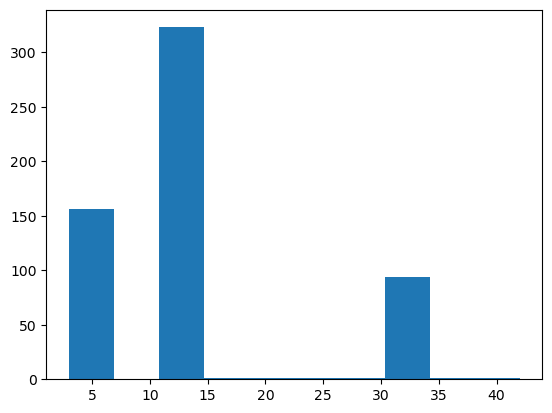

In [130]:
clique_sizes = []
for c in nx.find_cliques(G):
    #visualize non-edge cliques
    if len(c) > 2:
        clique_sizes.append(len(c))

plt.hist(clique_sizes)

In [137]:
pd.DataFrame(clique_sizes).value_counts()

13    162
3     133
12     96
11     64
34     62
33     32
5      20
4       3
14      1
15      1
20      1
24      1
30      1
36      1
42      1
Name: count, dtype: int64

In [141]:
clique_size_13 = []
for c in nx.find_cliques(G):
    if len(c) == 13:
        #print (c)
        clique_size_13.append(c)
        
clique_size_13

[[12, 45, 3950, 78, 111, 144, 177, 210, 243, 276, 309, 342, 375],
 [497, 1761, 2021, 2282, 2539, 2800, 946, 498, 1212, 1503, 3323, 3580, 3063],
 [499, 1760, 2020, 2281, 2538, 2799, 947, 501, 3062, 1209, 3322, 3579, 1502],
 [500, 1761, 2021, 2282, 2539, 2800, 1212, 947, 501, 1503, 3323, 3580, 3063],
 [502, 1504, 1762, 2022, 2283, 2540, 2803, 949, 504, 3064, 3324, 3582, 1215],
 [503, 1504, 1762, 2022, 2283, 2540, 2803, 949, 504, 3064, 3324, 3582, 1215],
 [511, 512, 3331, 3589, 1511, 1223, 1769, 2029, 2290, 2810, 2547, 955, 3071],
 [513, 3330, 515, 3588, 1510, 1222, 1768, 2028, 2289, 2809, 2546, 956, 3070],
 [514, 515, 3331, 3589, 1511, 1223, 1769, 2029, 2290, 2810, 2547, 956, 3071],
 [516, 3072, 3332, 3590, 518, 1512, 1224, 1770, 2030, 2291, 2811, 2548, 957],
 [517, 3072, 3332, 3590, 518, 1512, 1224, 1770, 2030, 2291, 2811, 2548, 957],
 [525, 2818, 963, 3079, 3339, 3597, 526, 1519, 1232, 1777, 2298, 2555, 2037],
 [527, 2817, 964, 3078, 3338, 3596, 1518, 1231, 1776, 529, 2297, 2554, 2036]

In [147]:
subclique = instances[instances['id'].isin(clique_size_13[0])]
subclique

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
12,valid_reg_0_,12,10880,81408,65,0,16.0,25.0,False
45,valid_reg_1_,45,11520,87552,65,2,19.0,36.0,False
78,valid_reg_2_,78,6912,84480,65,0,13.0,32.0,False
111,valid_reg_3_,111,512,84480,65,6,8.0,32.0,False
144,valid_reg_4_,144,11776,87552,65,6,19.0,36.0,False
177,valid_reg_5_,177,3840,87552,65,6,3.0,36.0,False
210,valid_reg_6_,210,512,78336,65,6,18.0,42.0,False
243,valid_reg_7_,243,512,84480,65,0,8.0,32.0,False
276,valid_reg_8_,276,1024,75264,65,0,28.0,31.0,False
309,valid_reg_9_,309,512,81408,65,6,7.0,37.0,False


In [149]:
congestion_13 = 0
for i in range(len(clique_size_13)):
    print(i)
    subclique = instances[instances['id'].isin(clique_size_13[i])]
    if subclique['congested'] == True:
        congestion_13 += 1

congestion_13

0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

(array([ 840.,  237.,    6.,    7.,  384., 1188., 1116.,   83.,   65.,
          26.]),
 array([ 4. , 11.4, 18.8, 26.2, 33.6, 41. , 48.4, 55.8, 63.2, 70.6, 78. ]),
 <BarContainer object of 10 artists>)

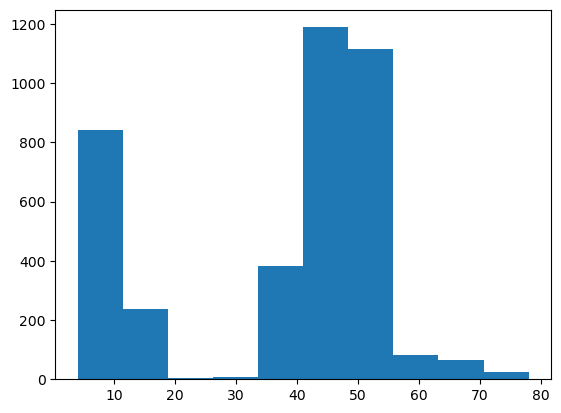

In [123]:
plt.hist(dict(G.degree()).values())

In [155]:
max_degree = max(dict(G.degree()).values())

In [156]:
min_degree = min(dict(G.degree()).values())

In [157]:
highest_degree_instance = -1
lowest_degree_instance = -1
for key, value in (G.degree()):
    if value == max_degree:
        highest_degree_instance = key
    if value == min_degree:
        lowest_degree_instance = key


In [158]:
instances[instances['id'] == highest_degree_instance]

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
3949,U4128,3949,23296,66048,34,0,27.0,29.0,False


In [159]:
instances[instances['id'] == lowest_degree_instance]

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
488,U3705,488,19584,66048,34,6,31.0,36.0,False


(array([  48., 1154.,    0.,   12.,    0.,  254.,   84.,  828., 1176.,
         396.]),
 array([ 0. ,  6.5, 13. , 19.5, 26. , 32.5, 39. , 45.5, 52. , 58.5, 65. ]),
 <BarContainer object of 10 artists>)

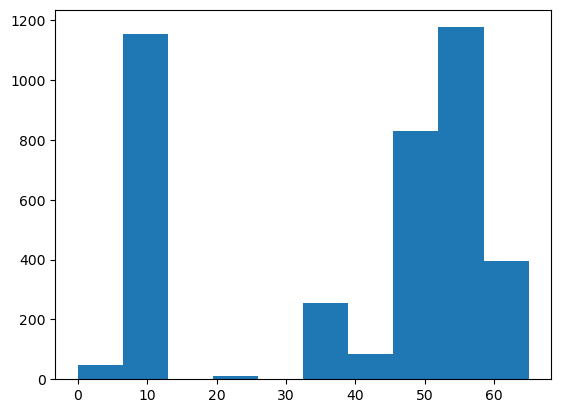

In [161]:
plt.hist(instances['cell'])

In [162]:
instances['cell'].value_counts()

cell
9     1152
56    1152
65     396
46     396
50     396
34     254
42      84
0       48
48      35
52      24
23      12
11       2
49       1
Name: count, dtype: int64

(array([1912.,    0.,    0.,   93.,    0.,    0.,   84.,    0.,    0.,
        1863.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

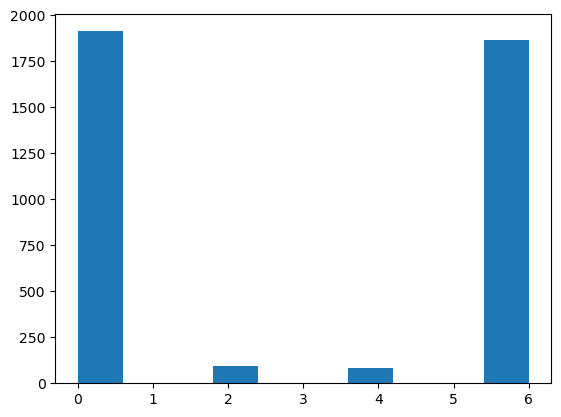

In [166]:
plt.hist(instances['orient'])

In [167]:
instances['orient'].value_counts()

orient
0    1912
6    1863
2      93
4      84
Name: count, dtype: int64

(array([   6.,   15.,   36.,   97.,  205.,  615., 1049., 1547.,  364.,
          18.]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

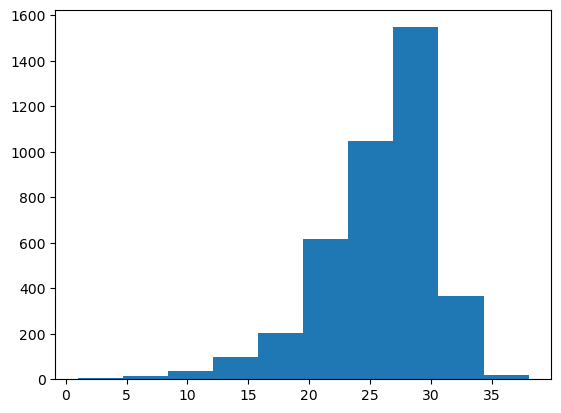

In [169]:
plt.hist(instances['routing_demand'])

In [170]:
instances['routing_demand'].value_counts()

routing_demand
28.0    486
26.0    429
27.0    413
29.0    401
25.0    357
24.0    263
30.0    247
23.0    221
31.0    196
22.0    164
21.0    143
32.0     92
20.0     87
19.0     76
18.0     50
33.0     47
17.0     46
14.0     40
16.0     33
34.0     29
15.0     29
13.0     28
12.0     17
35.0     15
10.0      9
7.0       9
11.0      7
8.0       5
9.0       3
38.0      3
1.0       2
4.0       2
3.0       1
2.0       1
6.0       1
Name: count, dtype: int64

(array([  17.,   21.,  223.,  360.,  395.,  716.,  256., 1962.,    0.,
           2.]),
 array([20. , 22.2, 24.4, 26.6, 28.8, 31. , 33.2, 35.4, 37.6, 39.8, 42. ]),
 <BarContainer object of 10 artists>)

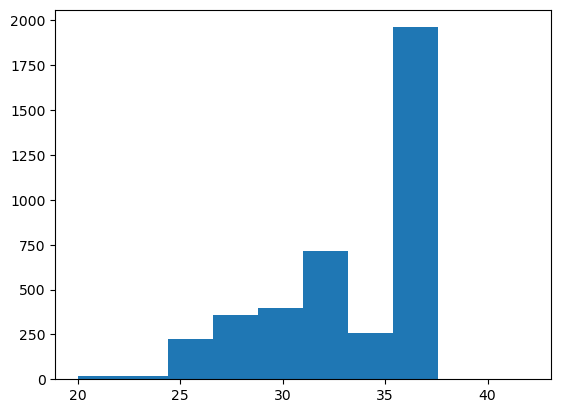

In [171]:
plt.hist(instances['routing_capacity'])

In [172]:
instances['routing_capacity'].value_counts()

routing_capacity
36.0    1961
31.0     325
28.0     280
29.0     275
32.0     225
26.0     215
33.0     166
34.0     158
30.0     120
35.0      98
27.0      80
24.0      18
20.0       9
25.0       8
22.0       4
21.0       4
23.0       3
42.0       2
37.0       1
Name: count, dtype: int64

In [ ]:
for k in range(instances.shape[0]):
    #print(k)
    xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']
    i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    
    
    
    d = 0 
    c = 0
    for l in list(congestion_data['layerList']): 
        lyr=list(congestion_data['layerList']).index(l)
        d += congestion_data['demand'][lyr][i][j]
        c += congestion_data['capacity'][lyr][i][j]
    demand[k] = d
    capacity[k] = c
        
instances['routing_demand'] = demand
instances['routing_capacity'] = capacity

In [173]:
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congested
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0,False
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0,False
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0,False
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0,False
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0,False
...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0,False
3948,U4125,3948,33664,66048,42,0,30.0,30.0,False
3949,U4128,3949,23296,66048,34,0,27.0,29.0,False
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0,False


In [176]:
instances = instances.drop(columns=['congested'])
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0
...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0
3948,U4125,3948,33664,66048,42,0,30.0,30.0
3949,U4128,3949,23296,66048,34,0,27.0,29.0
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0


In [177]:
instances['congestion'] = instances['routing_demand'] - instances['routing_capacity']
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congestion
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0,-8.0
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0,-5.0
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0,-10.0
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0,-11.0
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0,-2.0
...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0,0.0
3948,U4125,3948,33664,66048,42,0,30.0,30.0,0.0
3949,U4128,3949,23296,66048,34,0,27.0,29.0,-2.0
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0,-5.0


In [178]:
cells

[{'name': 'AND2_X1',
  'width': 768,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 0},
 {'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3},
 {'name': 'AND4_X1',
  'width': 1152,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id

In [180]:
individual_pins = []
for k in range(instances.shape[0]):
    cell_type = instances.iloc[k]['cell']
    cell_pins = len(cells[cell_type]['terms'])
    individual_pins.append(cell_pins)

instances['individual_pins'] = individual_pins
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congestion,individual_pins
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0,-8.0,4
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0,-5.0,4
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0,-10.0,4
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0,-11.0,4
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0,-2.0,4
...,...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0,0.0,3
3948,U4125,3948,33664,66048,42,0,30.0,30.0,0.0,3
3949,U4128,3949,23296,66048,34,0,27.0,29.0,-2.0,2
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0,-5.0,2


In [189]:
pin_counts = {}
cell_counts = {}

for k in range(instances.shape[0]):
    #print(k)
    xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']; individual_pins = instances.iloc[k]['individual_pins']
    i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    
    if (i, j) in pin_counts:
        pin_counts[(i, j)] += individual_pins
    else:
        pin_counts[(i, j)] = individual_pins
    
    if (i, j) in cell_counts:
        cell_counts[(i, j)] += 1
    else:
        cell_counts[(i, j)] = 1


grc_pin_density = []
grc_cell_density = []
for k in range(instances.shape[0]):
    #print(k)
    xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']; individual_pins = instances.iloc[k]['individual_pins']
    i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    grc_pin_density.append(pin_counts[(i, j)])
    grc_cell_density.append(cell_counts[(i, j)])
    
instances['grc_pin_density'] = grc_pin_density
instances['grc_cell_density'] = grc_cell_density
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,congestion,individual_pins,grc_pin_density,grc_cell_density
0,clk_gate_out_reg/latch,0,41984,44544,23,0,20.0,28.0,-8.0,4,12,3
1,clk_gate_out_reg_0/latch,1,41984,47616,23,6,23.0,28.0,-5.0,4,8,2
2,clk_gate_out_reg_1/latch,2,44160,44544,23,0,23.0,33.0,-10.0,4,10,3
3,clk_gate_out_reg_2/latch,3,44160,47616,23,0,22.0,33.0,-11.0,4,8,2
4,clk_gate_out_reg_3/latch,4,46336,47616,23,0,21.0,23.0,-2.0,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3947,U4123,3947,21888,53760,42,4,31.0,31.0,0.0,3,12,3
3948,U4125,3948,33664,66048,42,0,30.0,30.0,0.0,3,16,4
3949,U4128,3949,23296,66048,34,0,27.0,29.0,-2.0,2,17,6
3950,ZCTSBUF_205_132,3950,40576,44544,11,0,28.0,33.0,-5.0,2,12,3


(array([ 256.,    0.,  168.,    0.,    0.,  408.,    0., 2724.,    0.,
         396.]),
 array([2. , 2.4, 2.8, 3.2, 3.6, 4. , 4.4, 4.8, 5.2, 5.6, 6. ]),
 <BarContainer object of 10 artists>)

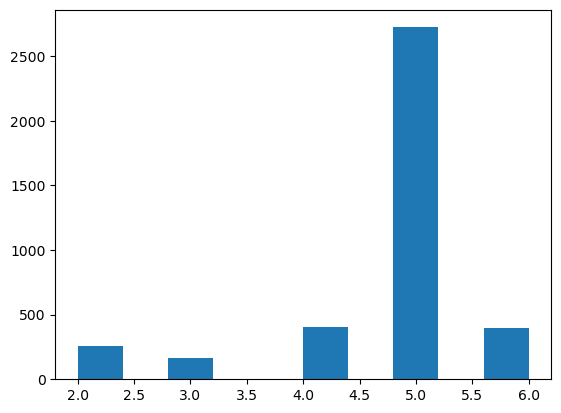

In [190]:
plt.hist(instances['individual_pins'])

(array([ 61.,  93.,  66., 644., 326., 918., 808., 813., 106., 117.]),
 array([ 3. ,  5.3,  7.6,  9.9, 12.2, 14.5, 16.8, 19.1, 21.4, 23.7, 26. ]),
 <BarContainer object of 10 artists>)

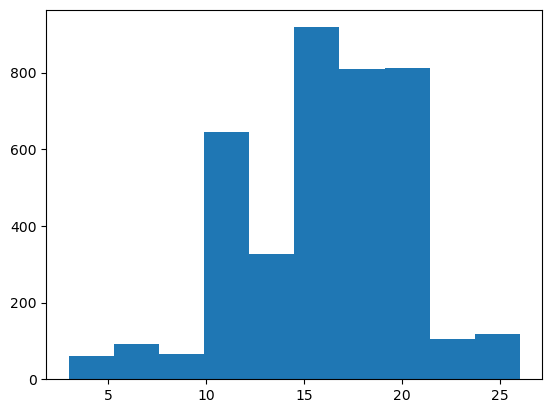

In [191]:
plt.hist(instances['grc_pin_density'])

(array([ 142.,  550.,    0., 1131.,    0., 1644.,  430.,    0.,   48.,
           7.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

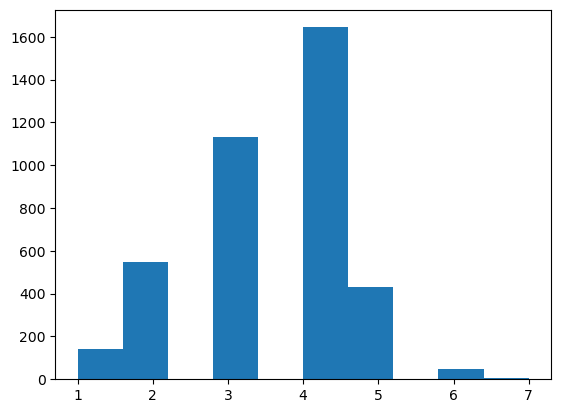

In [192]:
plt.hist(instances['grc_cell_density'])

In [198]:
def open_xbar_w_congestion(num):
    with gzip.open('NCSU-DigIC-GraphData-2023-07-25/xbar/' + str(num) + '/xbar.json.gz','rb') as f:
        design = json.loads(f.read().decode('utf-8'))
    instances = pd.DataFrame(design['instances'])
    nets = pd.DataFrame(design['nets'])
    
    congestion_data = np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/' + str(num) + '/xbar_congestion.npz')
    xbst=buildBST(congestion_data['xBoundaryList'])
    ybst=buildBST(congestion_data['yBoundaryList'])
    demand = np.zeros(shape = [instances.shape[0],])
    capacity = np.zeros(shape = [instances.shape[0],])
    for k in range(instances.shape[0]):
        #print(k)
        xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']
        i,j=getGRCIndex(xloc,yloc,xbst,ybst)
        d = 0 
        c = 0
        for l in list(congestion_data['layerList']): 
            lyr=list(congestion_data['layerList']).index(l)
            d += congestion_data['demand'][lyr][i][j]
            c += congestion_data['capacity'][lyr][i][j]
        demand[k] = d
        capacity[k] = c
        
    instances['routing_demand'] = demand
    instances['routing_capacity'] = capacity
    
    return instances, nets

In [199]:
instances_2, nets_2 = open_xbar_w_congestion(2)
instances_2

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity
0,clk_gate_out_reg/latch,0,83072,29184,23,0,35.0,52.0
1,clk_gate_out_reg_0/latch,1,22400,81408,23,0,27.0,48.0
2,clk_gate_out_reg_1/latch,2,84992,81408,23,0,16.0,42.0
3,clk_gate_out_reg_2/latch,3,89088,47616,23,0,46.0,63.0
4,clk_gate_out_reg_3/latch,4,34176,66048,23,0,31.0,51.0
...,...,...,...,...,...,...,...,...
6867,ctmTdsLR_2_11789,6867,22912,41472,0,4,34.0,51.0
6868,ctmTdsLR_1_11805,6868,12800,4608,44,4,9.0,61.0
6869,ctmTdsLR_2_11806,6869,19072,26112,48,6,47.0,67.0
6870,ctmTdsLR_3_11807,6870,15488,13824,48,4,25.0,58.0


In [200]:
def build_graph(num):
    conn=np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/' + str(num) + '/xbar_connectivity.npz')
    A = coo_matrix((conn['data'], (conn['row'], conn['col'])), shape=conn['shape'])
    A = A.__mul__(A.T)
    G = nx.from_numpy_array(A)
    return G

G_2 = build_graph(2)

(array([3123.,  980.,  848.,  753.,  535.,  215.,  199.,  143.,   58.,
          18.]),
 array([ 4., 11., 18., 25., 32., 39., 46., 53., 60., 67., 74.]),
 <BarContainer object of 10 artists>)

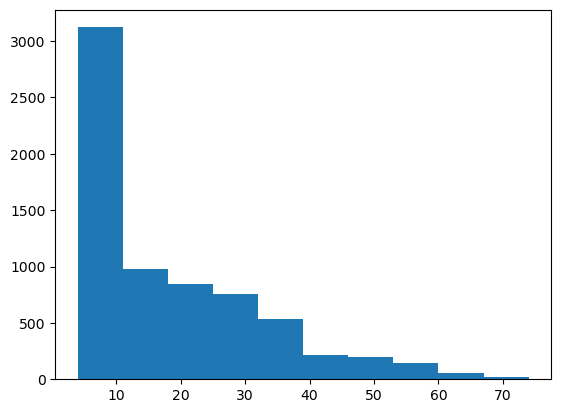

In [207]:
plt.hist(dict(G_2.degree()).values())

(array([3123.,  980.,  848.,  753.,  535.,  215.,  199.,  143.,   58.,
          18.]),
 array([ 4., 11., 18., 25., 32., 39., 46., 53., 60., 67., 74.]),
 <BarContainer object of 10 artists>)

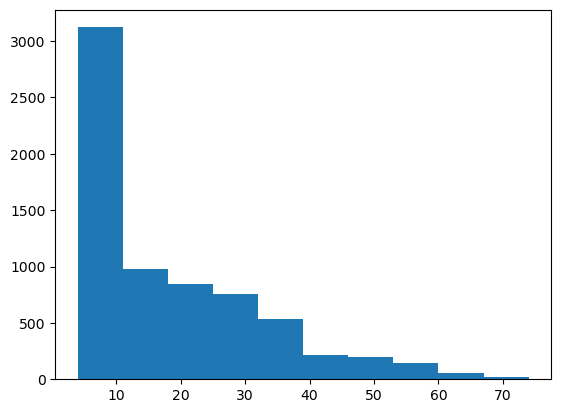

In [208]:
G_3 = build_graph(3)
plt.hist(dict(G_2.degree()).values())

(array([ 840.,  237.,    6.,    7.,  384., 1188., 1116.,   83.,   65.,
          26.]),
 array([ 4. , 11.4, 18.8, 26.2, 33.6, 41. , 48.4, 55.8, 63.2, 70.6, 78. ]),
 <BarContainer object of 10 artists>)

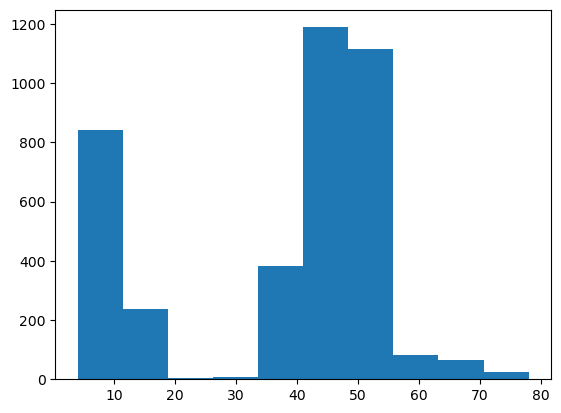

In [210]:
G_1 = build_graph(1)
plt.hist(dict(G_1.degree()).values())

In [209]:
instances_3, nets_3 = open_xbar_w_congestion(3)
instances_3

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity
0,clk_gate_out_reg/latch,0,46592,90624,23,0,30.0,61.0
1,clk_gate_out_reg_0/latch,1,46592,7680,23,0,38.0,61.0
2,clk_gate_out_reg_1/latch,2,46336,93696,23,0,17.0,39.0
3,clk_gate_out_reg_2/latch,3,48512,26112,23,0,29.0,61.0
4,clk_gate_out_reg_3/latch,4,48512,13824,23,0,32.0,64.0
...,...,...,...,...,...,...,...,...
6908,ctmTdsLR_4_15054,6908,30592,56832,34,2,31.0,67.0
6909,ctmTdsLR_1_15065,6909,52480,29184,48,6,31.0,64.0
6910,ctmTdsLR_2_15066,6910,54784,32256,34,2,26.0,56.0
6911,ctmTdsLR_1_15075,6911,27136,59904,49,0,34.0,67.0


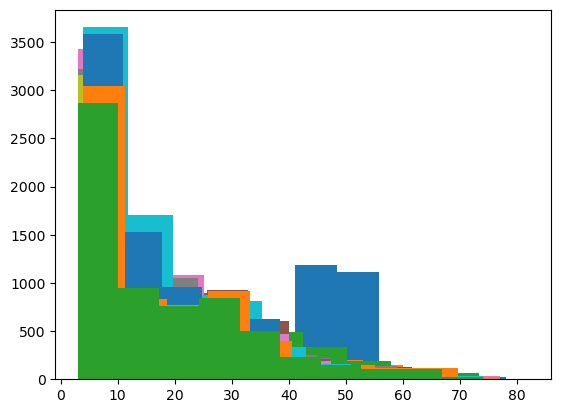

In [211]:
for i in range(13):
    G = build_graph(i+1)
    plt.hist(dict(G.degree()).values())

In [220]:
def extract_features(instances):
    individual_pins = []
    for k in range(instances.shape[0]):
        cell_type = instances.iloc[k]['cell']
        cell_pins = len(cells[cell_type]['terms'])
        individual_pins.append(cell_pins)
    
    instances['individual_pins'] = individual_pins
    instances
    
    pin_counts = {}
    cell_counts = {}

    for k in range(instances.shape[0]):
        #print(k)
        xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']; individual_pins = instances.iloc[k]['individual_pins']
        i,j=getGRCIndex(xloc,yloc,xbst,ybst)
    
        if (i, j) in pin_counts:
            pin_counts[(i, j)] += individual_pins
        else:
            pin_counts[(i, j)] = individual_pins
    
        if (i, j) in cell_counts:
            cell_counts[(i, j)] += 1
        else:
            cell_counts[(i, j)] = 1


    grc_pin_density = []
    grc_cell_density = []
    for k in range(instances.shape[0]):
        #print(k)
        xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']; individual_pins = instances.iloc[k]['individual_pins']
        i,j=getGRCIndex(xloc,yloc,xbst,ybst)
        grc_pin_density.append(pin_counts[(i, j)])
        grc_cell_density.append(cell_counts[(i, j)])
    
    instances['grc_pin_density'] = grc_pin_density
    instances['grc_cell_density'] = grc_cell_density
    return instances

In [221]:
instances_3 = extract_features(instances_3)
instances_3

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,individual_pins,grc_pin_density,grc_cell_density
0,clk_gate_out_reg/latch,0,46592,90624,23,0,30.0,61.0,4,38,11
1,clk_gate_out_reg_0/latch,1,46592,7680,23,0,38.0,61.0,4,11,3
2,clk_gate_out_reg_1/latch,2,46336,93696,23,0,17.0,39.0,4,40,11
3,clk_gate_out_reg_2/latch,3,48512,26112,23,0,29.0,61.0,4,11,4
4,clk_gate_out_reg_3/latch,4,48512,13824,23,0,32.0,64.0,4,14,4
...,...,...,...,...,...,...,...,...,...,...,...
6908,ctmTdsLR_4_15054,6908,30592,56832,34,2,31.0,67.0,2,14,4
6909,ctmTdsLR_1_15065,6909,52480,29184,48,6,31.0,64.0,3,13,4
6910,ctmTdsLR_2_15066,6910,54784,32256,34,2,26.0,56.0,2,17,6
6911,ctmTdsLR_1_15075,6911,27136,59904,49,0,34.0,67.0,3,10,3


In [223]:
instance_dfs = []
net_dfs = []

for i in range(5):
    instances, nets = open_xbar_w_congestion(i + 1)
    instance_dfs.append(instances)
    net_dfs.append(nets)

In [224]:
for i in range(len(instance_dfs)):
    current_instances = instance_dfs[i]
    current_instances = extract_features(current_instances)
    instance_dfs[i] = current_instances

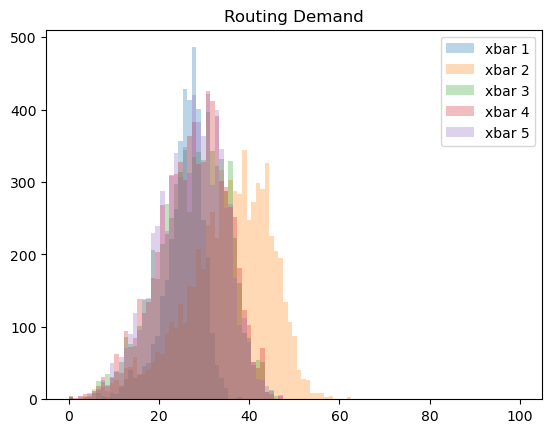

In [262]:
from matplotlib import pyplot

bins = np.linspace(0, 100, 100)

for i in range(len(instance_dfs)):
    current_instance = instance_dfs[i]
    pyplot.hist(current_instance['routing_demand'], bins, alpha = 0.3, label = 'xbar ' + str(i + 1))

pyplot.legend(loc='upper right')
pyplot.title('Routing Demand')
pyplot.show()

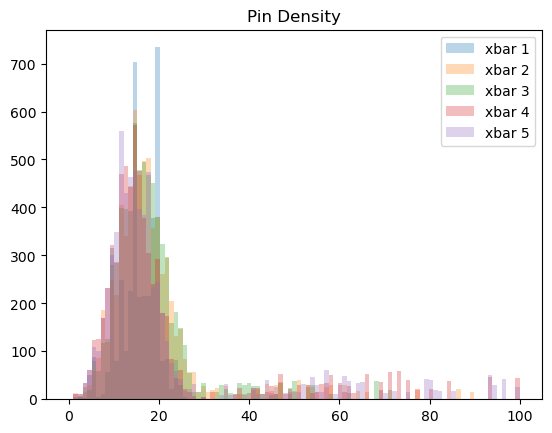

In [263]:
for i in range(len(instance_dfs)):
    current_instance = instance_dfs[i]
    pyplot.hist(current_instance['grc_pin_density'], bins, alpha = 0.3, label = 'xbar ' + str(i + 1))

pyplot.legend(loc='upper right')
pyplot.title('Pin Density')
pyplot.show()

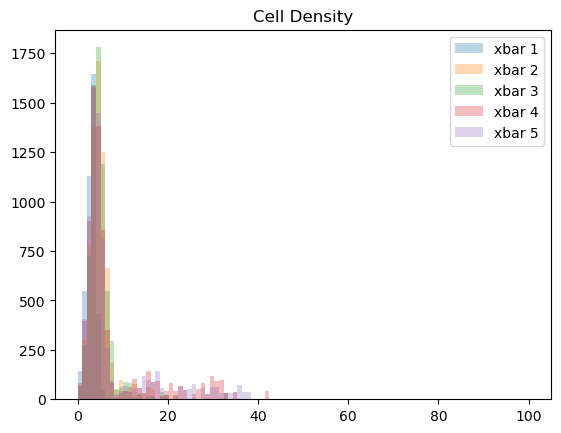

In [264]:
for i in range(len(instance_dfs)):
    current_instance = instance_dfs[i]
    pyplot.hist(current_instance['grc_cell_density'], bins, alpha = 0.3, label = 'xbar ' + str(i + 1))

pyplot.legend(loc='upper right')
pyplot.title('Cell Density')
pyplot.show()

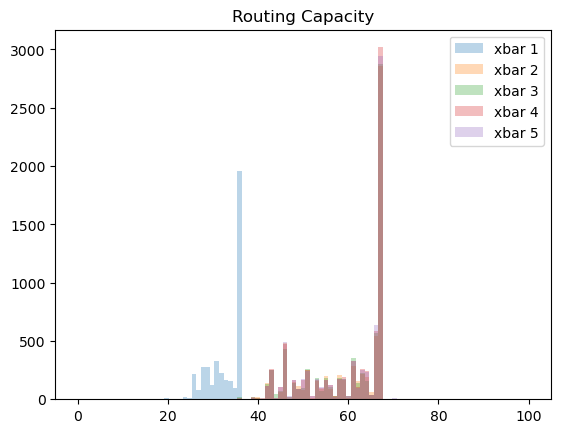

In [265]:
for i in range(len(instance_dfs)):
    current_instance = instance_dfs[i]
    pyplot.hist(current_instance['routing_capacity'], bins, alpha = 0.3, label = 'xbar ' + str(i + 1))

pyplot.legend(loc='upper right')
pyplot.title('Routing Capacity')
pyplot.show()

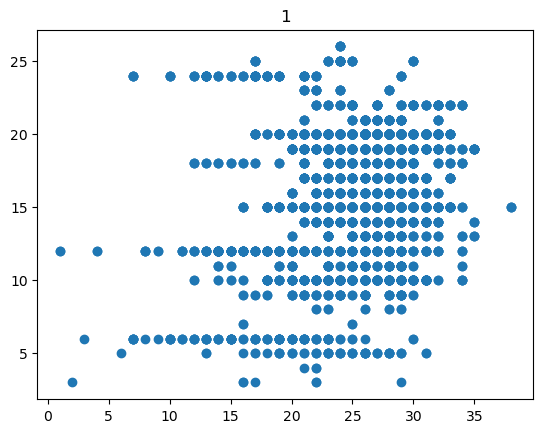

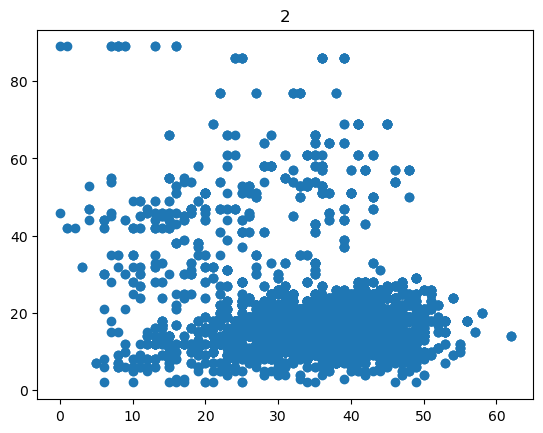

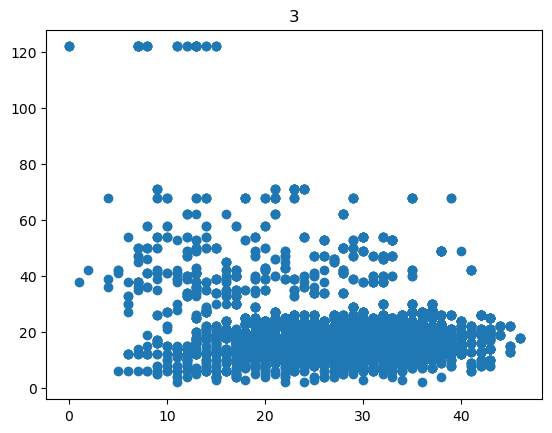

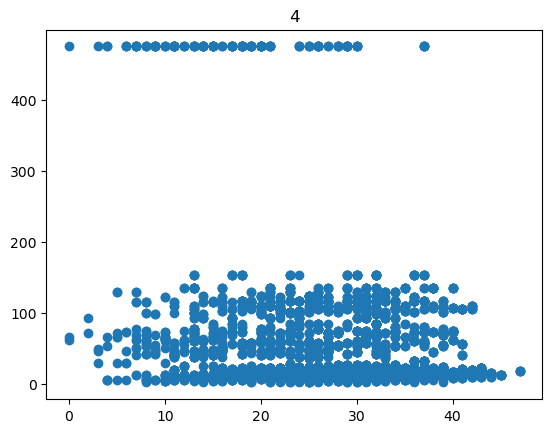

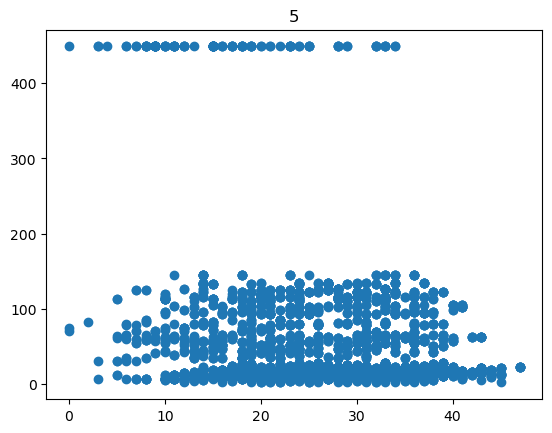

In [237]:
for i in range(len(instance_dfs)):
    current_instance = instance_dfs[i]
    plt.figure()
    plt.scatter(current_instance['routing_demand'], current_instance['grc_pin_density'])#bins, alpha = 0.3, label = i + 1)
    plt.title(i+1)
    plt.show()
#pyplot.legend(loc='upper right')
#pyplot.title('Routing Demand')
#pyplot.show()

In [238]:
def extract_grc_index(instances):
    instance_df = instances
    grc_indices = []
    for k in range(instance_df.shape[0]):
        #print(k)
        xloc = instance_df.iloc[k]['xloc']; yloc = instance_df.iloc[k]['yloc']
        i,j=getGRCIndex(xloc,yloc,xbst,ybst)
        grc_indices.append((i, j))
    instance_df['grc_indices'] = grc_indices
    return instance_df


In [239]:
for i in range(len(instance_dfs)):
    current_instances = instance_dfs[i]
    current_instances = extract_grc_index(current_instances)
    instance_dfs[i] = current_instances

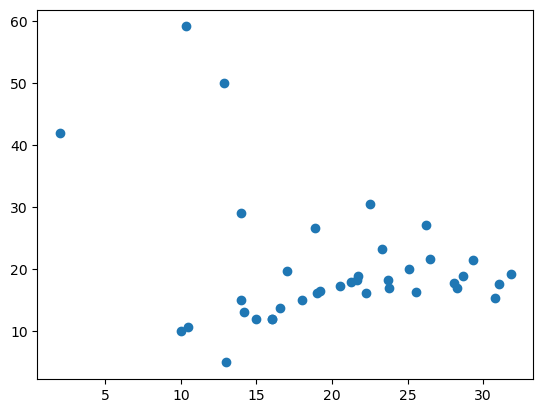

In [257]:
test = instances_3.drop(columns=['name', 'id', 'xloc', 'yloc', 'cell', 'orient', 'individual_pins']).groupby('routing_capacity').mean()
plt.scatter(test['routing_demand'], test['grc_pin_density'])

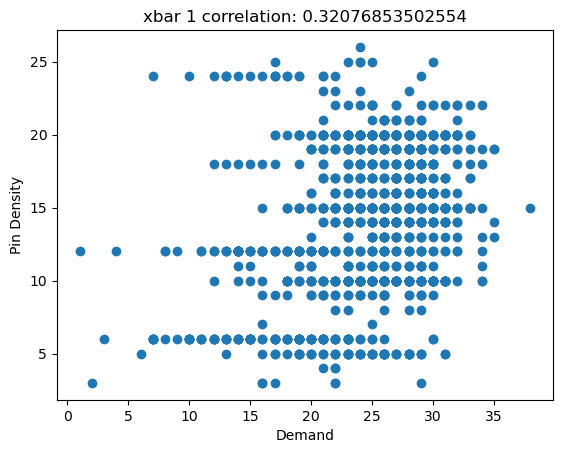

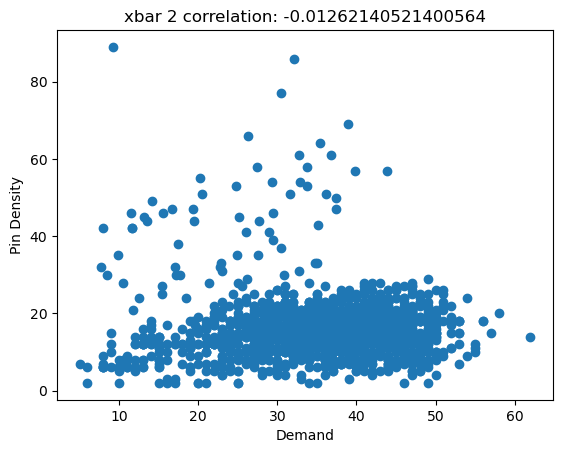

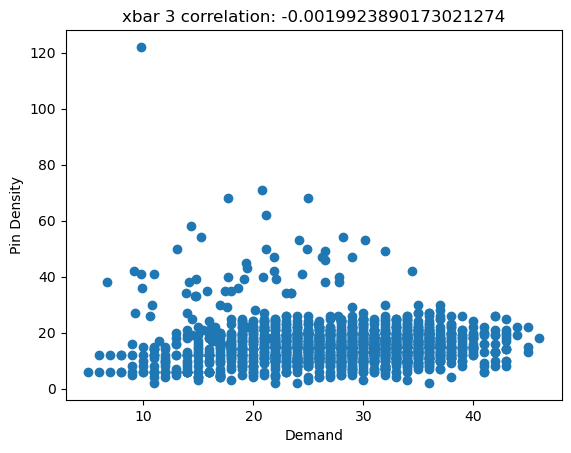

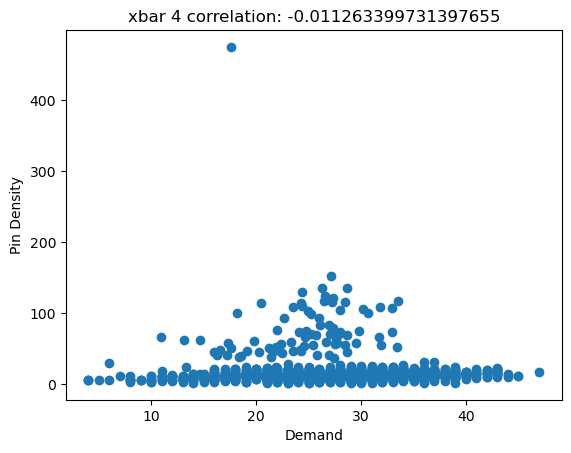

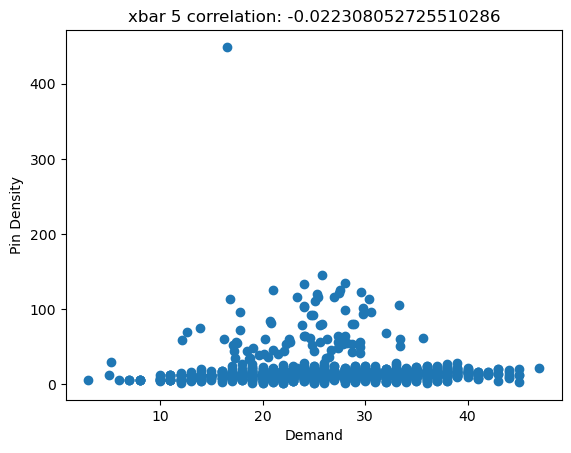

In [261]:
for i in range(len(instance_dfs)):
    current_instances = instance_dfs[i]
    current_instances = current_instances.drop(columns=['name', 'id', 'xloc', 'yloc', 'cell', 'orient', 'individual_pins'])
    current_instances = current_instances.groupby('grc_indices').mean()
    
    correlation = np.corrcoef(current_instances['routing_demand'], current_instances['grc_pin_density'])[0,1]
    
    plt.figure()
    plt.scatter(current_instances['routing_demand'], current_instances['grc_pin_density'])#bins, alpha = 0.3, label = i + 1)
    plt.title('xbar ' + str(i+1) + ' correlation: ' + str(correlation))
    plt.xlabel("Demand")
    plt.ylabel("Pin Density")
    plt.show()

In [267]:
instances

,name,id,xloc,yloc,cell,orient,routing_demand,routing_capacity,individual_pins,grc_pin_density,grc_cell_density,grc_indices
0,clk_gate_out_reg/latch,0,48000,96768,23,0,23.0,65.0,4,62,23,"(57, 30)"
1,clk_gate_out_reg_0/latch,1,55424,7680,23,0,31.0,54.0,4,6,2,"(5, 35)"
2,clk_gate_out_reg_1/latch,2,51712,93696,23,0,32.0,64.0,4,69,19,"(57, 33)"
3,clk_gate_out_reg_2/latch,3,52224,56832,23,0,23.0,64.0,4,12,5,"(37, 33)"
4,clk_gate_out_reg_3/latch,4,51840,10752,23,0,42.0,64.0,4,14,4,"(7, 33)"
...,...,...,...,...,...,...,...,...,...,...,...,...
7253,ctmTdsLR_1_21012,7253,14720,53760,42,6,35.0,58.0,3,13,3,"(35, 9)"
7254,ctmTdsLR_2_21013,7254,13696,50688,48,6,29.0,48.0,3,14,4,"(33, 8)"
7255,ctmTdsLR_3_21014,7255,12800,50688,52,0,29.0,48.0,5,14,4,"(33, 8)"
7256,ctmTdsLR_1_21015,7256,16128,75264,44,0,35.0,67.0,4,11,3,"(49, 10)"


In [219]:
instances#['congestion'].value_counts()
cells

[{'name': 'AND2_X1',
  'width': 768,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 0},
 {'name': 'AND2_X2',
  'width': 896,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'Z', 'id': 3, 'dir': 1}],
  'id': 1},
 {'name': 'AND3_X1',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 2},
 {'name': 'AND3_X2',
  'width': 1024,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id': 3, 'dir': 0},
   {'name': 'Z', 'id': 4, 'dir': 1}],
  'id': 3},
 {'name': 'AND4_X1',
  'width': 1152,
  'height': 1536,
  'terms': [{'name': 'A1', 'id': 1, 'dir': 0},
   {'name': 'A2', 'id': 2, 'dir': 0},
   {'name': 'A3', 'id

In [ ]:
def extract_congestion(num):
    congestion_data = np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/' + str(num) + '/xbar_congestion.npz')
    xbst=buildBST(congestion_data['xBoundaryList'])
    ybst=buildBST(congestion_data['yBoundaryList'])
    demand = np.zeros(shape = [instances.shape[0],])
    capacity = np.zeros(shape = [instances.shape[0],])
    for k in range(instances.shape[0]):
        #print(k)
        xloc = instances.iloc[k]['xloc']; yloc = instances.iloc[k]['yloc']
        i,j=getGRCIndex(xloc,yloc,xbst,ybst)
        d = 0 
        c = 0
        for l in list(congestion_data['layerList']): 
            lyr=list(congestion_data['layerList']).index(l)
            d += congestion_data['demand'][lyr][i][j]
            c += congestion_data['capacity'][lyr][i][j]
        demand[k] = d
        capacity[k] = c
    return demand, capacity
instances['routing_demand'] = demand
instances['routing_capacity'] = capacity